In [25]:
import numpy
import flowx 
import simulation
import time
from matplotlib import pyplot
%matplotlib inline 

# Dirichlet BC

In [26]:
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0
center_vars = [ 'asol', 'ivar', 'rvar', 'eror' ]
user_bc = 'dirichlet'
bc_type = { 'ivar': [ user_bc, user_bc, user_bc, user_bc ] }
bc_val  = { 'ivar': [ 0.0, 0.0, 0.0, 0.0 ] }
grid = flowx.Grid( 'cell-centered', center_vars, nx, ny, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val )

In [27]:
simulation.get_analytical( grid, 'asol', user_bc)
simulation.get_rhs( grid, 'rvar', user_bc)

In [28]:
start = time.time()
res, num_iters = flowx.poisson.solve_cg( grid, 'ivar', 'rvar', verbose = True )
print( time.time() - start, 'seconds' )

Conjugate Gradient method:
- Final residual: 3.076105996674508e-11
0.10406494140625 seconds


In [29]:
num_iters

1

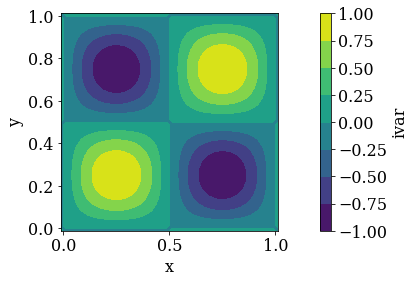

In [30]:
flowx.io.plot_contour( grid, 'ivar' )

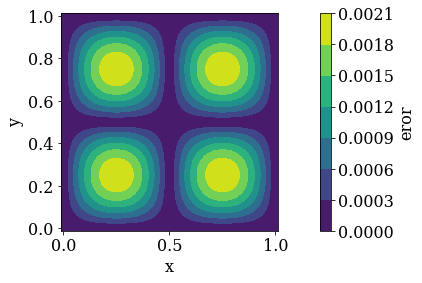

In [31]:
grid.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( grid, 'eror')

## Refine grid

In [32]:
nx2, ny2 = 100, 100
grid2 = flowx.Grid( 'cell-centered', center_vars, nx2, ny2, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val)
simulation.get_analytical( grid2, 'asol', user_bc)
simulation.get_rhs( grid2, 'rvar', user_bc)

In [33]:
start = time.time()
res, num_iters = flowx.poisson.solve_cg( grid2, 'ivar', 'rvar', verbose = True )
print( time.time() - start, 'seconds' )

Conjugate Gradient method:
- Final residual: 4.4827288485798764e-10
2.9998579025268555 seconds


In [34]:
num_iters

1

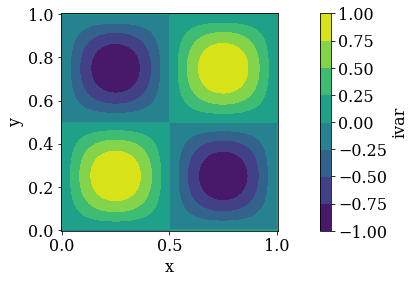

In [35]:
flowx.io.plot_contour( grid2, 'ivar' )

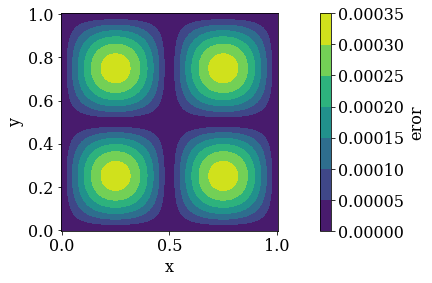

In [36]:
grid2.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( grid2, 'eror')

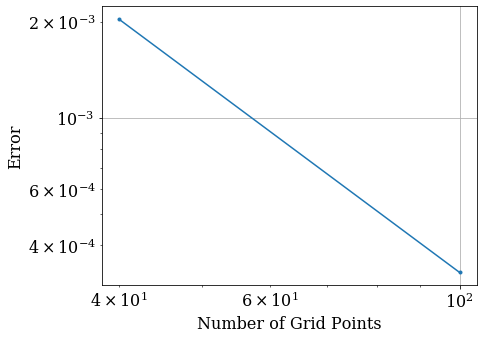

In [37]:
er = [ numpy.max( grid.get_values( 'eror' ) ), numpy.max( grid2.get_values( 'eror' ) ) ]
num_points = [ nx, nx2 ]
fig = pyplot.figure( figsize = ( 7, 5 ) )
pyplot.loglog( num_points, er, '.-' )
pyplot.xlabel( 'Number of Grid Points' )
pyplot.ylabel( 'Error' )
pyplot.grid()
pyplot.tight_layout()
fig.savefig( 'CG1plot.png' );

# Neumann BC

In [38]:
user_bc = 'neumann'
bc_type = {'ivar': [user_bc, user_bc, user_bc, user_bc]}
gridN = flowx.Grid( 'cell-centered', center_vars, nx, ny, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val)
simulation.get_analytical( gridN, 'asol', user_bc)
simulation.get_rhs( gridN, 'rvar', user_bc)

In [39]:
start = time.time()
res, num_iters = flowx.poisson.solve_cg( gridN, 'ivar', 'rvar', verbose = True )
print( time.time() - start, 'seconds' )

Conjugate Gradient method:
- Final residual: 3.513017385055563e-11
0.10054540634155273 seconds


In [40]:
num_iters

1

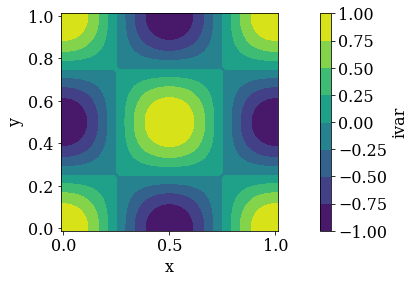

In [41]:
flowx.io.plot_contour( gridN, 'ivar' )

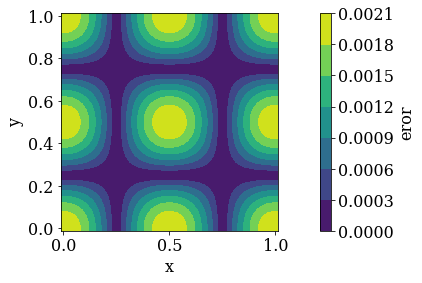

In [42]:
gridN.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( gridN, 'eror')

## Refine Grid

In [43]:
gridN2 = flowx.Grid( 'cell-centered', center_vars, nx2, ny2, xmin, xmax, ymin, ymax, user_bc_type = bc_type, user_bc_val = bc_val)
simulation.get_analytical( gridN2, 'asol', user_bc)
simulation.get_rhs( gridN2, 'rvar', user_bc)

In [44]:
start = time.time()
res, num_iters = flowx.poisson.solve_cg( gridN2, 'ivar', 'rvar', verbose = True )
print( time.time() - start, 'seconds' )

Conjugate Gradient method:
- Final residual: 4.141998625506316e-10
2.9567630290985107 seconds


In [45]:
num_iters

1

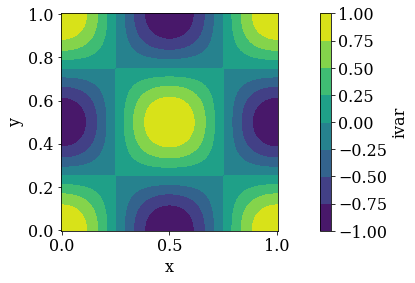

In [22]:
flowx.io.plot_contour( gridN2, 'ivar' )

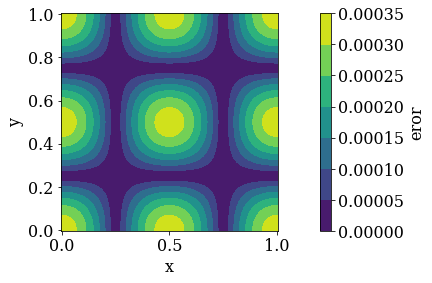

In [23]:
gridN2.get_error( 'eror', 'ivar', 'asol' )
flowx.io.plot_contour( gridN2, 'eror')

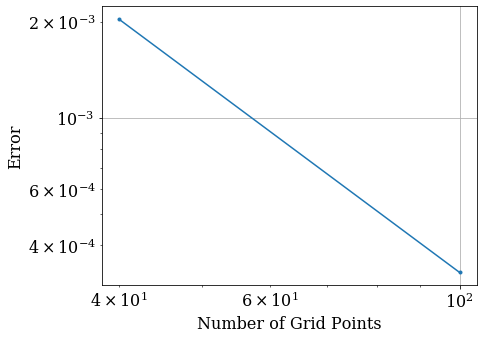

In [24]:
er = [ numpy.max( gridN.get_values( 'eror' ) ), numpy.max( gridN2.get_values( 'eror' ) ) ]
num_points = [ nx, nx2 ]
fig = pyplot.figure( figsize = ( 7, 5 ) )
pyplot.loglog( num_points, er, '.-' )
pyplot.xlabel( 'Number of Grid Points' )
pyplot.ylabel( 'Error' )
pyplot.grid()
pyplot.tight_layout()
fig.savefig( 'CG2plot.png' );